`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


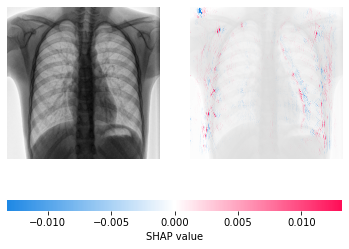

In [2]:
import os
import shap
import numpy as np
import cv2
import tensorflow as tf
import pickle

# Load the trained model
loaded_model = tf.keras.models.load_model('64x3-CNN.model')

# Set the learning phase to False
tf.keras.backend.set_learning_phase(0)

# Prepare the data
DATADIR = "/Users/rohinv/Downloads/archive/test/opacity"
CATEGORIES = ["normal", "opacity"]

# Choose an image for explanation
img_path = os.path.join(DATADIR, CATEGORIES[0], os.listdir(os.path.join(DATADIR, CATEGORIES[0]))[0])
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(img_array, (300, 300))
image = image.reshape((-1, 300, 300, 1))
image = image.astype('float32') / 255.0

# Update the model call
output = loaded_model(image, training=False)

# Load a smaller subset of the training data for reference
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
reference_data = X[:50]  # Adjust the subset size as per your needs

# Create the explainer and generate SHAP values
explainer = shap.DeepExplainer(loaded_model, reference_data)
shap_values = explainer.shap_values(image)

# Visualize the explanation
shap.image_plot(shap_values, -image)


In [15]:
expected_value = np.mean(shap_values)

print("Expected value of f(X):", expected_value)

Expected value of f(X): -8.888560821258687e-07


In [16]:
output_value = output[0][0]  # Assuming the model output is a scalar

print("Output value of the model:", output_value)

Output value of the model: tf.Tensor(3.2434546e-06, shape=(), dtype=float32)


In [17]:
output = loaded_model(image, training=False)

# Get the output values
output_values = output[0]  # Assuming the model outputs a vector

# Find the predicted class
predicted_class = np.argmax(output_values)

print("Output values of the model:", output_values)
print("Predicted class:", predicted_class)

Output values of the model: tf.Tensor([3.2434546e-06], shape=(1,), dtype=float32)
Predicted class: 0
